In [ ]:
import pandas as pd
from dateutil import parser

# Create dictionaries with the data
department_df = pd.read_csv("Department_Information.csv")
employee_df = pd.read_csv("Employee_Information.csv")
counseling_df = pd.read_csv("Student_Counceling_Information.csv")
performance_df = pd.read_csv("Student_Performance_Data.csv")

# Finding duplicate Department_IDs
duplicate_ids = department_df['Department_ID'].value_counts()[department_df['Department_ID'].value_counts() > 1].index

# Prints that there is or no duplicates, and prints any duplicates if there are some
if duplicate_ids.empty:
    print("No duplicate Department_IDs found in Department_Information.")
else:
    print("Flag: Duplicate Department_IDs found in Department_Information!")
    print("The duplicate IDs in Department_Information are: \n")

    all_duplicate_ids = pd.DataFrame()

    for Department_ID in duplicate_ids:
        duplicate_row_ids = department_df[department_df['Department_ID'] == Department_ID]
        all_duplicate_ids = pd.concat([all_duplicate_ids, duplicate_row_ids])
    print(all_duplicate_ids[['Department_ID', 'Department_Name', 'DOE']])

print("----------------------------------")

# Printing department names that are duplicates
duplicate_name = department_df['Department_Name'].value_counts()[department_df['Department_Name'].value_counts() > 1].index

if duplicate_name.empty:
    print("No duplicate Department_Names found in Department_Information.")
else:
    print("\nFlag: Duplicate Department_Names found in Department_Information!")
    print("The duplicate names in Department_Information are: \n")

    all_duplicate_names = pd.DataFrame()

    for Department_Name in duplicate_name:
        duplicate_row_names = department_df[department_df['Department_Name'] == Department_Name]
        all_duplicate_names = pd.concat([all_duplicate_names, duplicate_row_names])
    print(all_duplicate_names[['Department_ID', 'Department_Name', 'DOE']])

print("----------------------------------")

# Printing dates that are over 1900
department_df_copy = department_df.copy()

department_df_copy['DOE'] = department_df_copy['DOE'].astype(str)
department_df_copy['Year_Str'] = department_df_copy['DOE'].str[-4:]
department_df_copy['Year'] = pd.to_numeric(department_df_copy['Year_Str'], errors='coerce')

rows_with_year_below_1900 = department_df_copy[department_df_copy['Year'] < 1900]

if not rows_with_year_below_1900.empty:
    print("\nFlag: Rows with a year lower than 1900 found!")
    print("The years lower than 1900 in Department_Information are: \n")
    print(rows_with_year_below_1900[['Department_ID', 'Department_Name', 'DOE']])
else:
    print("No rows with year lower than 1900 found.")

print("----------------------------------")

# Printing any nulls in any attribute
dep_info_with_nulls = department_df[department_df.isnull().any(axis=1)]

if not dep_info_with_nulls.empty:
    print("\nFlag: Nulls found in Department_Information!")
    print("The nulls in Department_Information are: \n")
    print(dep_info_with_nulls)
else:
    print("No rows with null values found.")

print("----------------------------------")

In [ ]:
#Student Counceling Information

import pandas as pd
from dateutil import parser

# Create dictionaries with the data
counseling_df = pd.read_csv("Student_Counceling_Information.csv")

# Check for null values in counseling_df
rows_with_nulls_counseling = counseling_df[counseling_df.isnull().any(axis=1)]

# Adjusting index to correspond to row numbers in Excel sheet
if not rows_with_nulls_counseling.empty:
    rows_with_nulls_counseling.reset_index(drop=True, inplace=True)
    rows_with_nulls_counseling.index += 1 

    # Print the information
    print("\nFlag: Nulls found in Student Counseling Information!")
    print("The rows with null values in Student Counseling Information are: \n")
    print(rows_with_nulls_counseling)
else:
    print("No rows with null values found in Student Counseling Information.")

print("----------------------------------")

mismatched_rows = counseling_df[counseling_df['Department_Admission'] != counseling_df['Department_Choices']]

# Flagging the rows where Department Admission doesn't match Department Choice
if not mismatched_rows.empty:
    print("\nFlag: Mismatch between Department Admission and Department_Choices!")
    print("The rows where Department Admission doesn't match Department_Choices are: \n")
    print(mismatched_rows)
else:
    print("All rows have matching Department Admission and Department_Choices.")

print("----------------------------------")

In [ ]:
#Student Performance Data
import pandas as pd
from dateutil import parser

performance_df = pd.read_csv("Student_Performance_Data.csv")

#Finding Invalid Marks
rows_with_invalid_marks = performance_df[(performance_df['Marks'] < 0) | (performance_df['Marks'] > 100)]

print("Flag: Rows with invalid marks found in Student_Performance_Data!")
print("The rows where marks are invalid are: \n")
print(rows_with_invalid_marks)

#Displaying Table without the marks that are invalid
valid_performance_df = performance_df[(performance_df['Marks'] >= 0) & (performance_df['Marks'] <= 100)]

print("\nStudent Performance Data after filtering out rows with invalid Marks:")
print()
print(valid_performance_df)

print("----------------------------------")

#Finding invalid hours
invalid_hours = performance_df[performance_df['Effort_Hours'] < 0]

if not invalid_hours.empty:
    print("\nFlag: Rows with negative Hours found in Student Performance Data!")
    print("The rows where Hours are negative are: \n")
    print(invalid_hours)
else:
    print("All Hours are non-negative.")

#Displaying table without the hours that are invalid
valid_performance_df = performance_df[performance_df['Effort_Hours'] >= 0]

#Display the DataFrame
print("\nStudent Performance Data after filtering out rows with invalid Hours:")
print()
print(valid_performance_df)

print("----------------------------------")

#Printing rows that find a student id that has a more than 1 mark per paper
is_duplicate = performance_df.duplicated(subset=['Student_ID', 'Paper_ID'], keep=False)
duplicates_df = performance_df[is_duplicate]
if duplicates_df.empty:
    print("No duplicates based on the combination of Student_ID and Paper_ID were found.")
else:
    print("\nFlag: Duplicate rows based on the combination of Student_ID and Paper_ID found!")
    print("The duplicate rows are: \n")
    print(duplicates_df)

print("----------------------------------")

#printing any missing values in student_performance_data and discard them
performance_info_with_nulls = performance_df[performance_df.isnull().any(axis=1)]

if not performance_info_with_nulls.empty:
    print("\nFlag: Nulls found in Student_Performance_Data!")
    print("The nulls in Student_Performance_Data are: \n")
    print(performance_info_with_nulls)
else:
    print("No rows with null values found.")

print()
print("Student_Performance_Data after filtering out rows with nulls: \n")
dropped_performance_nulls_df = performance_df.dropna()
print(dropped_performance_nulls_df)

print("----------------------------------")


Predicted mark for 10 effort hours: 81.91546178813809


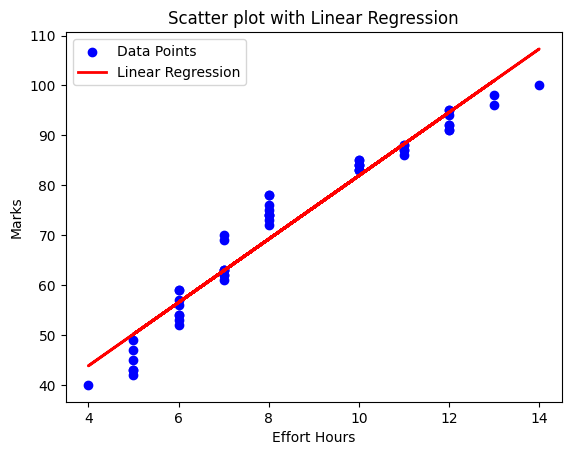

In [2]:
#Neccesary Calculations
#SID20131151
#SID20149500
#SID20182516

import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Load the dataset
sp = pd.read_csv('Student_Performance_Data.csv')

sp_sid_20131151 = sp[sp['Student_ID'] == 'SID20131151']
sp_sid_20149500 = sp[sp['Student_ID'] == 'SID20149500']
sp_sid_20182516 = sp[sp['Student_ID'] == 'SID20149500']

# Extract columns
X = sp_sid_20131151['Effort_Hours'].values.reshape(-1, 1)  # Independent variable (Effort_Hours)
y = sp_sid_20131151['Marks'].values.reshape(-1, 1)         # Dependent variable (Marks)

# # Fit linear regression model
model = LinearRegression()
model.fit(X, y)

hours = [[10]]  # We need to provide input as a 2D array
predicted_mark = model.predict(hours)

print("Predicted mark for 10 effort hours:", predicted_mark[0][0])

# Make predictions
y_pred = model.predict(X)

# Plot scatter plot
plt.scatter(X, y, color='blue', label='Data Points')

# Plot regression line
plt.plot(X, y_pred, color='red', linewidth=2, label='Linear Regression')
# Add labels and legend
plt.xlabel('Effort Hours')
plt.ylabel('Marks')
plt.title('Scatter plot with Linear Regression')
plt.legend()
# Show plot
plt.show()